In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

In [9]:
cdc_data = "C:\\Users\\MegaN\\Downloads\\Infant__neonatal__postneonatal__fetal__and_perinatal_mortality_rates__by_detailed_race_and_Hispanic_origin_of_mother__United_States_20250330.csv"
df = pd.read_csv(cdc_data)

In [4]:
# Preprocessing: Select relevant numerical columns for clustering
numeric_columns = df.select_dtypes(include=[np.number]).columns
data = df[numeric_columns].dropna() 

In [ ]:
# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
wcss = []
for i in range(1, 11):  # Testing cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Inertia measures clustering compactness

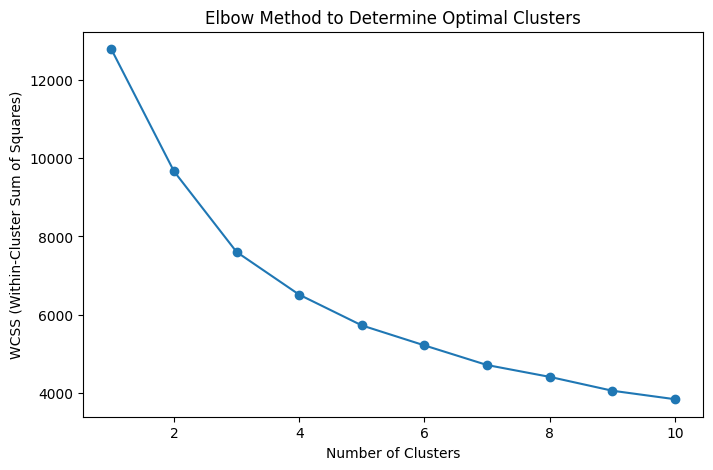

In [ ]:
# Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

In [ ]:
# Drop NaNs and reset index
df = df.dropna().reset_index(drop=True)

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Scale numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# K-Means
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)  # Assign clusters

print(df[['Cluster']].head())


   Cluster
0        2
1        2
2        2
3        2
4        2


In [ ]:
if scaled_data.shape[1] == 2:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['Cluster'], palette='viridis')
    plt.xlabel(numeric_columns[0])
    plt.ylabel(numeric_columns[1])
    plt.title("K-Means Clustering Results")
    plt.show()

#shows the first few rows with cluster labels
print(df.head())

                                           INDICATOR  INDICATOR_NUM  \
0  Infant, neonatal, postneonatal, fetal, and per...              1   
1  Infant, neonatal, postneonatal, fetal, and per...              1   
2  Infant, neonatal, postneonatal, fetal, and per...              1   
3  Infant, neonatal, postneonatal, fetal, and per...              1   
4  Infant, neonatal, postneonatal, fetal, and per...              1   

                                    UNIT  UNIT_NUM  \
0    Infant deaths per 1,000 live births         1   
1    Infant deaths per 1,000 live births         1   
2  Neonatal deaths per 1,000 live births         2   
3  Neonatal deaths per 1,000 live births         2   
4  Neonatal deaths per 1,000 live births         2   

                                STUB_NAME  STUB_NAME_NUM  \
0                Race and Hispanic origin              2   
1  Race and Hispanic origin (Single race)              4   
2                Race and Hispanic origin              2   
3       

In [ ]:
#Shows the dataset columns to consider for the query items
df = pd.read_csv(cdc_data)

print("Dataset Columns:", df.columns)

Dataset Columns: Index(['INDICATOR', 'INDICATOR_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM',
       'ESTIMATE', 'FLAG'],
      dtype='object')


In [ ]:
#Shows the column names and data types
print(df.info())

#Show first few rows of the data set
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       2688 non-null   object 
 1   INDICATOR_NUM   2688 non-null   int64  
 2   UNIT            2688 non-null   object 
 3   UNIT_NUM        2688 non-null   int64  
 4   STUB_NAME       2688 non-null   object 
 5   STUB_NAME_NUM   2688 non-null   int64  
 6   STUB_LABEL      2688 non-null   object 
 7   STUB_LABEL_NUM  2688 non-null   float64
 8   YEAR            2688 non-null   int64  
 9   YEAR_NUM        2688 non-null   int64  
 10  ESTIMATE        2130 non-null   float64
 11  FLAG            617 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 252.1+ KB
None
                                           INDICATOR  INDICATOR_NUM  \
0  Infant, neonatal, postneonatal, fetal, and per...              1   
1  Infant, neonatal, postneonatal, fetal, and per...

In [ ]:
features = ['INDICATOR', 'INDICATOR_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME','STUB_NAME_NUM', 'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM','ESTIMATE', 'FLAG']

df_filtered = df[features].dropna().reset_index(drop=True).copy()

In [16]:
query_item = pd.DataFrame([{
    'INDICATOR': 'Infant Mortality Rate',  
    'UNIT': 'Per 1,000 Live Births',  
    'STUB_NAME': 'Non-Hispanic White',  
    'YEAR': 2020,  
    'ESTIMATE': 5.6  
}])

In [20]:
# Example query: Find similar mortality rates for a given year
query_items = pd.DataFrame([
    {'ESTIMATE': 5.0, 'YEAR': 2020},  # Example: Infant mortality in 2020
    {'ESTIMATE': 6.2, 'YEAR': 2015},  # Example: Another year/mortality rate
])

# Normalize query items
query_scaled = scaler.transform(query_items)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- FLAG
- INDICATOR
- INDICATOR_NUM
- STUB_LABEL
- STUB_LABEL_NUM
- ...


In [22]:
query_item = pd.DataFrame([{
    'INDICATOR': 'Infant Mortality Rate',  
    'UNIT': 'Per 1,000 Live Births',  
    'STUB_NAME': 'Non-Hispanic White',  
    'YEAR': 2020,  
    'ESTIMATE': 5.6  
}])
query_scaled = scaler.transform(query_items)

for i, query in query_items.iterrows():
    df_filtered[f"Similarity_Score_{i+1}"] = distances[i]

top_matches = {}
for i in range(len(query_items)):
    top_matches[f"Query {i+1}"] = df_filtered.nsmallest(10, f"Similarity_Score_{i+1}")

# Print results
for query_name, matches in top_matches.items():
    print(f"\n🔍 Top 10 Similar Entries for {query_name}:")
    print(matches)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- FLAG
- INDICATOR
- INDICATOR_NUM
- STUB_LABEL
- STUB_LABEL_NUM
- ...
